IMPORT ALL NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

UPLOAD THE DATASET USING PANDAS

In [2]:
BeerQuality = pd.read_csv('Beer Dataset.csv')

USING A FEW FUNCTIONS, A BRIEF ANALYSIS OF THE DATASET IS PERFORMED

In [3]:
BeerQuality.head(30)

Name    Style  \
0                          Amber  Altbier   
1                     Double Bag  Altbier   
2                 Long Trail Ale  Altbier   
3                   Doppelsticke  Altbier   
4   Sleigh'r Dark Doüble Alt Ale  Altbier   
5                         Sticke  Altbier   
6              Okto Festival Ale  Altbier   
7            Southampton Altbier  Altbier   
8                         Copper  Altbier   
9            Organic Münster Alt  Altbier   
10                       Altbier  Altbier   
11                   Gerst Amber  Altbier   
12                  Ad Astra Ale  Altbier   
13                Copperhead Ale  Altbier   
14                 Ten Years Alt  Altbier   
15              Three Blind Mice  Altbier   
16                       Ishmael  Altbier   
17                  Headwall Alt  Altbier   
18               Alt-eration Ale  Altbier   
19       Schell's Schmaltz's Alt  Altbier   
20               Frankenheim Alt  Altbier   
21                Iron Works Alt  Altbier   
22       Diebels Premium Altbier  Altbier   
23                 Mission Amber  Altbier   
24               Hövels Original  Altbier   
25           Secret Spot Alt Ale  Altbier   
26              Lighthouse Amber  Altbier   
27    Série Signature Sticke Alt  Altbier   
28         Crooked Coast Altbier  Altbier   
29                   Gravel Road  Altbier   

                                             Brewery  \
0                                Alaskan Brewing Co.   
1                             Long Trail Brewing Co.   
2                             Long Trail Brewing Co.   
3   Uerige Obergärige Hausbrauerei GmbH / Zum Uerige   
4                            Ninkasi Brewing Company   
5   Uerige Obergärige Hausbrauerei GmbH / Zum Uerige   
6                    Widmer Brothers Brewing Company   
7                          Southampton Publick House   
8                       The Olde Mecklenburg Brewery   
9                            Brauerei Pinkus Mueller   
10  Uerige Obergärige Hausbrauerei GmbH / Zum Uerige   
11                             Yazoo Brewing Company   
12                            Free State Brewing Co.   
13                           Fordham Brewing Company   
14                           Victory Brewing Company   
15                          Mother's Brewing Company   
16                       Rising Tide Brewing Company   
17                             Tuckerman Brewing Co.   
18                                      Hops & Grain   
19                     August Schell Brewing Company   
20                        Privatbrauerei Frankenheim   
21                              Metropolitan Brewing   
22                     Brauerei Diebels GmbH & Co KG   
23                                   Mission Brewery   
24                               Hövels Hausbrauerei   
25                   Evolution Craft Brewing Company   
26                         Cheboygan Brewing Company   
27                           Les Trois Mousquetaires   
28                                 Driftwood Brewery   
29                       Rahr & Sons Brewing Company   

                                     Beer Name (Full)  \
0                   Alaskan Brewing Co. Alaskan Amber   
1                   Long Trail Brewing Co. Double Bag   
2               Long Trail Brewing Co. Long Trail Ale   
3   Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...   
4   Ninkasi Brewing Company Sleigh'r Dark Doüble A...   
5   Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...   
6                Widmer Brothers Brewing Company Okto   
7       Southampton Publick House Southampton Altbier   
8             The Olde Mecklenburg Brewery OMB Copper   
9         Brauerei Pinkus Mueller Organic Münster Alt   
10  Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...   
11                  Yazoo Brewing Company Gerst Amber   
12                Free State Brewing Co. Ad Astra Ale   
13     Fordham Brewing Company Fordham Copperhead Ale   
14              Victory Brewing Company 

In [4]:
BeerQuality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3169 non-null   object 
 2   Brewery            3166 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

In [5]:
BeerQuality.describe()

ABV      Min IBU      Max IBU  Astringency         Body  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean      6.526688    21.180482    38.986863    16.515796    46.129496   
std       2.546997    13.242242    21.355281    10.410661    25.947842   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000    15.000000    25.000000     9.000000    29.000000   
50%       6.000000    20.000000    35.000000    14.000000    40.000000   
75%       7.600000    25.000000    45.000000    21.000000    58.000000   
max      57.500000    65.000000   100.000000    81.000000   175.000000   

           Alcohol       Bitter        Sweet         Sour        Salty  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean     17.055990    36.364404    58.270879    33.145449     1.017204   
std      17.331334    25.791152    34.281310    35.780172     2.132651   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000    17.000000    33.000000    11.000000     0.000000   
50%      11.000000    31.000000    54.000000    22.000000     0.000000   
75%      22.000000    52.000000    77.000000    42.000000     1.000000   
max     139.000000   150.000000   263.000000   284.000000    48.000000   

            Fruits        Hoppy       Spices        Malty  review_aroma  \
count  3197.000000  3197.000000  3197.000000  3197.000000   3163.000000   
mean     38.529559    40.924617    18.345637    75.330935      3.642637   
std      32.296646    30.403641    23.756582    39.909338      0.502349   
min       0.000000     0.000000     0.000000     0.000000      1.509615   
25%      12.000000    18.000000     4.000000    45.000000      3.428194   
50%      29.000000    33.000000    10.000000    73.000000      3.724638   
75%      60.000000    56.000000    23.000000   103.000000      3.980123   
max     175.000000   172.000000   184.000000   239.000000      5.000000   

       review_appearance  review_palate  review_taste  review_overall  \
count        3187.000000    3187.000000   3184.000000     3187.000000   
mean            3.753746       3.660390      3.705730        3.747562   
std             0.403824       0.450519      0.508490        0.444877   
min             1.571429       1.285714      1.214286        1.136364   
25%             3.604344       3.469859      3.500000        3.567371   
50%             3.833333       3.742604      3.793218        3.831121   
75%             4.000000       3.965909      4.035616        4.033374   
max             4.666667       5.000000      5.000000        5.000000   

       number_of_reviews  
count        3197.000000  
mean          233.284955  
std           361.811847  
min             1.000000  
25%            23.000000  
50%            93.000000  
75%           284.000000  
max          3290.000000

In [6]:
BeerQuality.shape

(3197, 25)

In [7]:
BeerQuality.isnull().sum()

Name                  0
Style                28
Brewery              31
Beer Name (Full)      0
Description           0
ABV                   0
Min IBU               0
Max IBU               0
Astringency           0
Body                  0
Alcohol               0
Bitter                0
Sweet                 0
Sour                  0
Salty                 0
Fruits                0
Hoppy                 0
Spices                0
Malty                 0
review_aroma         34
review_appearance    10
review_palate        10
review_taste         13
review_overall       10
number_of_reviews     0
dtype: int64

DROPPING IRRELEVANT COLUMNS

In [8]:
BeerQuality = BeerQuality.drop(['Beer Name (Full)', 'Description'], axis = 1)

In [9]:
BeerQuality.head()

Name    Style  \
0                         Amber  Altbier   
1                    Double Bag  Altbier   
2                Long Trail Ale  Altbier   
3                  Doppelsticke  Altbier   
4  Sleigh'r Dark Doüble Alt Ale  Altbier   

                                            Brewery  ABV  Min IBU  Max IBU  \
0                               Alaskan Brewing Co.  5.3       25       50   
1                            Long Trail Brewing Co.  7.2       25       50   
2                            Long Trail Brewing Co.  5.0       25       50   
3  Uerige Obergärige Hausbrauerei GmbH / Zum Uerige  8.5       25       50   
4                           Ninkasi Brewing Company  7.2       25       50   

   Astringency  Body  Alcohol  Bitter  ...  Fruits  Hoppy  Spices  Malty  \
0           13    32        9      47  ...      33     57       8    111   
1           12    57       18      33  ...      24     35      12     84   
2           14    37        6      42  ...      10     54       4     62   
3           13    55       31      47  ...      49     40      16    119   
4           25    51       26      44  ...      11     51      20     95   

   review_aroma  review_appearance  review_palate  review_taste  \
0      3.498994           3.636821       3.556338      3.643863   
1      3.798337           3.846154       3.904366      4.024948   
2      3.409814           3.667109       3.600796      3.631300   
3      4.148098           4.033967       4.150815      4.205163   
4      3.625000           3.973958       3.734375      3.765625   

   review_overall  number_of_reviews  
0        3.847082                497  
1        4.034304                481  
2        3.830239                377  
3        4.005435                368  
4        3.817708                 96  

[5 rows x 23 columns]

TREATING MISSING VALUES

In [10]:
BeerQuality.isnull().sum()

Name                  0
Style                28
Brewery              31
ABV                   0
Min IBU               0
Max IBU               0
Astringency           0
Body                  0
Alcohol               0
Bitter                0
Sweet                 0
Sour                  0
Salty                 0
Fruits                0
Hoppy                 0
Spices                0
Malty                 0
review_aroma         34
review_appearance    10
review_palate        10
review_taste         13
review_overall       10
number_of_reviews     0
dtype: int64

In [11]:
catImputer = SimpleImputer(missing_values= np.nan, strategy = 'most_frequent')
catImputer = catImputer.fit(BeerQuality[['Style', 'Brewery']])
BeerQuality[['Style', 'Brewery']] = catImputer.transform(BeerQuality[['Style', 'Brewery']])

In [12]:
BeerQuality.isnull().sum()

Name                  0
Style                 0
Brewery               0
ABV                   0
Min IBU               0
Max IBU               0
Astringency           0
Body                  0
Alcohol               0
Bitter                0
Sweet                 0
Sour                  0
Salty                 0
Fruits                0
Hoppy                 0
Spices                0
Malty                 0
review_aroma         34
review_appearance    10
review_palate        10
review_taste         13
review_overall       10
number_of_reviews     0
dtype: int64

In [13]:
numImputer = SimpleImputer(missing_values= np.nan, strategy = 'mean')
numImputer = numImputer.fit(BeerQuality[['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall']])
BeerQuality[['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall']] = numImputer.transform(BeerQuality[['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall']])

In [14]:
BeerQuality.isnull().sum()

Name                 0
Style                0
Brewery              0
ABV                  0
Min IBU              0
Max IBU              0
Astringency          0
Body                 0
Alcohol              0
Bitter               0
Sweet                0
Sour                 0
Salty                0
Fruits               0
Hoppy                0
Spices               0
Malty                0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
number_of_reviews    0
dtype: int64

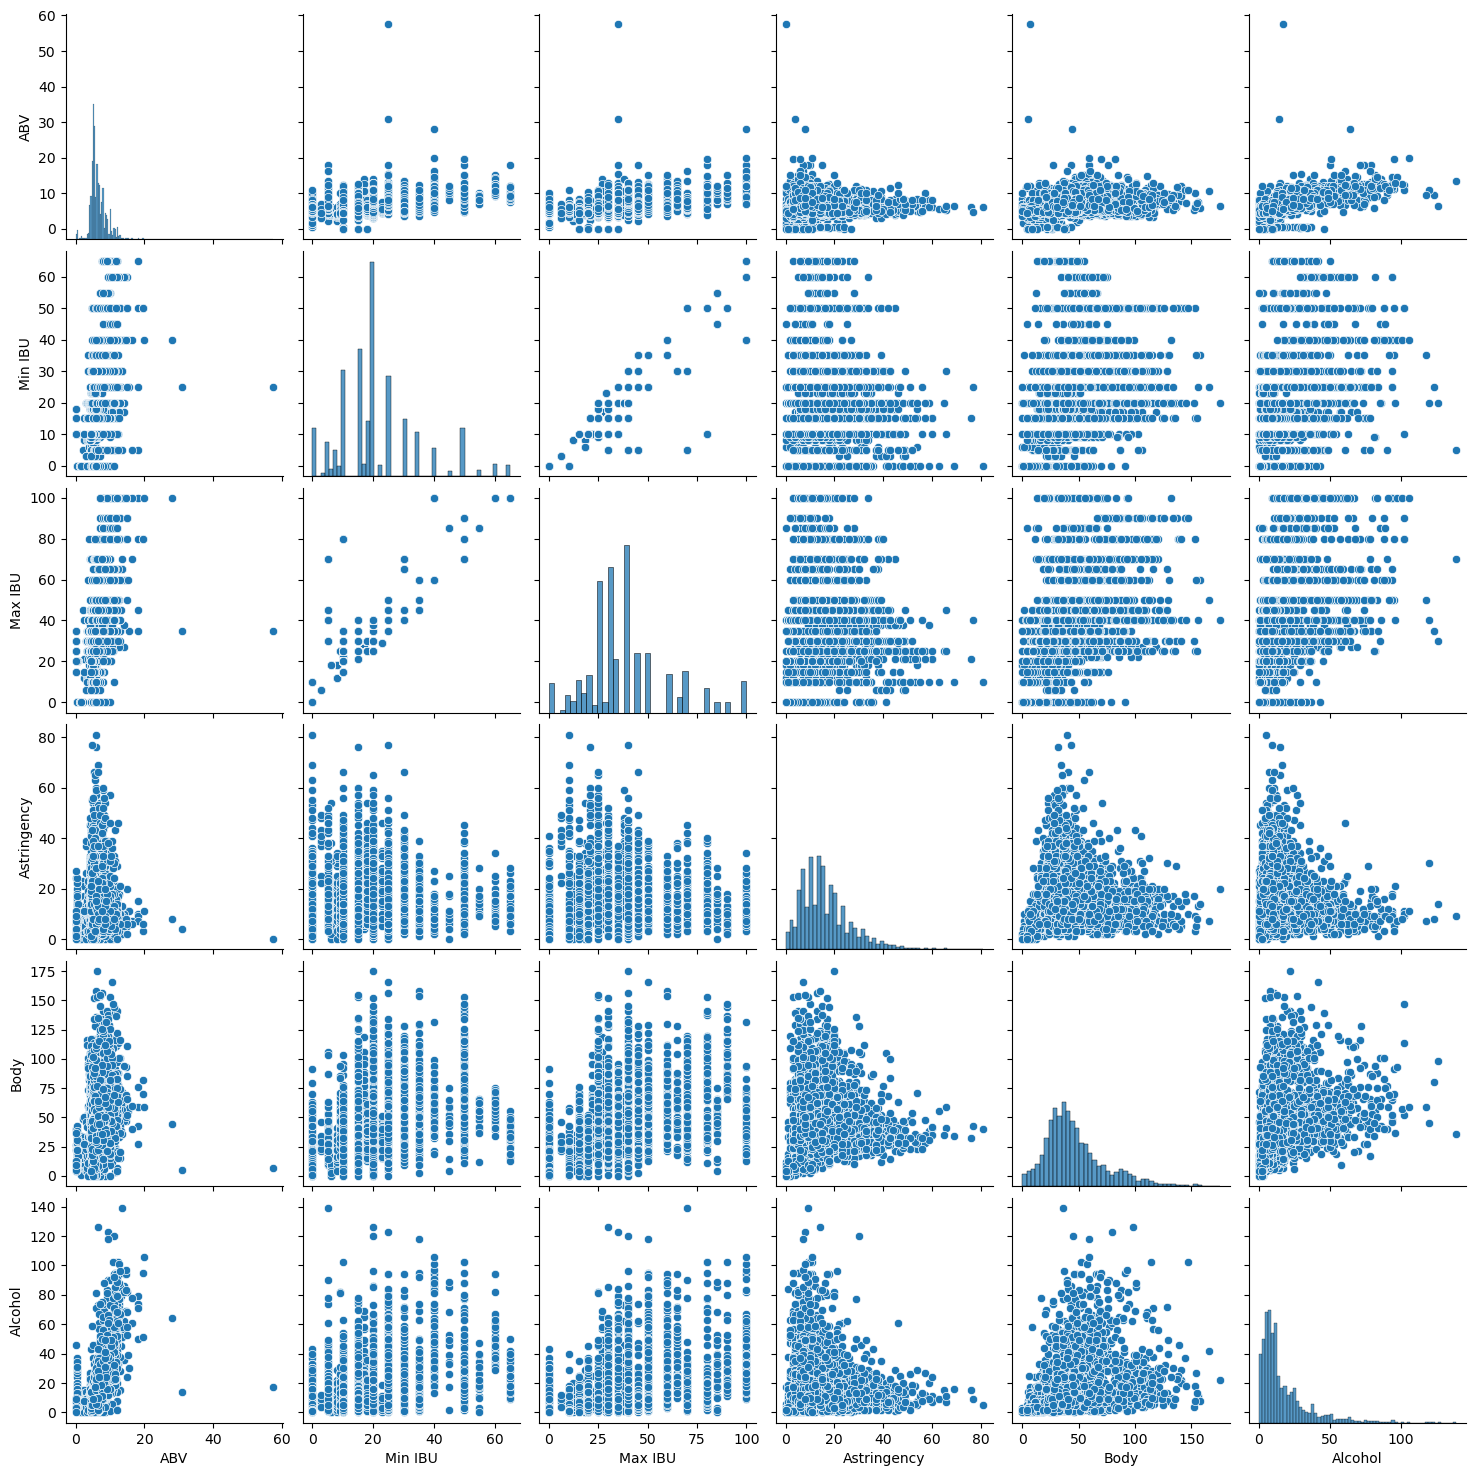

In [15]:
select_columns = ['ABV', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol']
sns.pairplot(BeerQuality[select_columns])

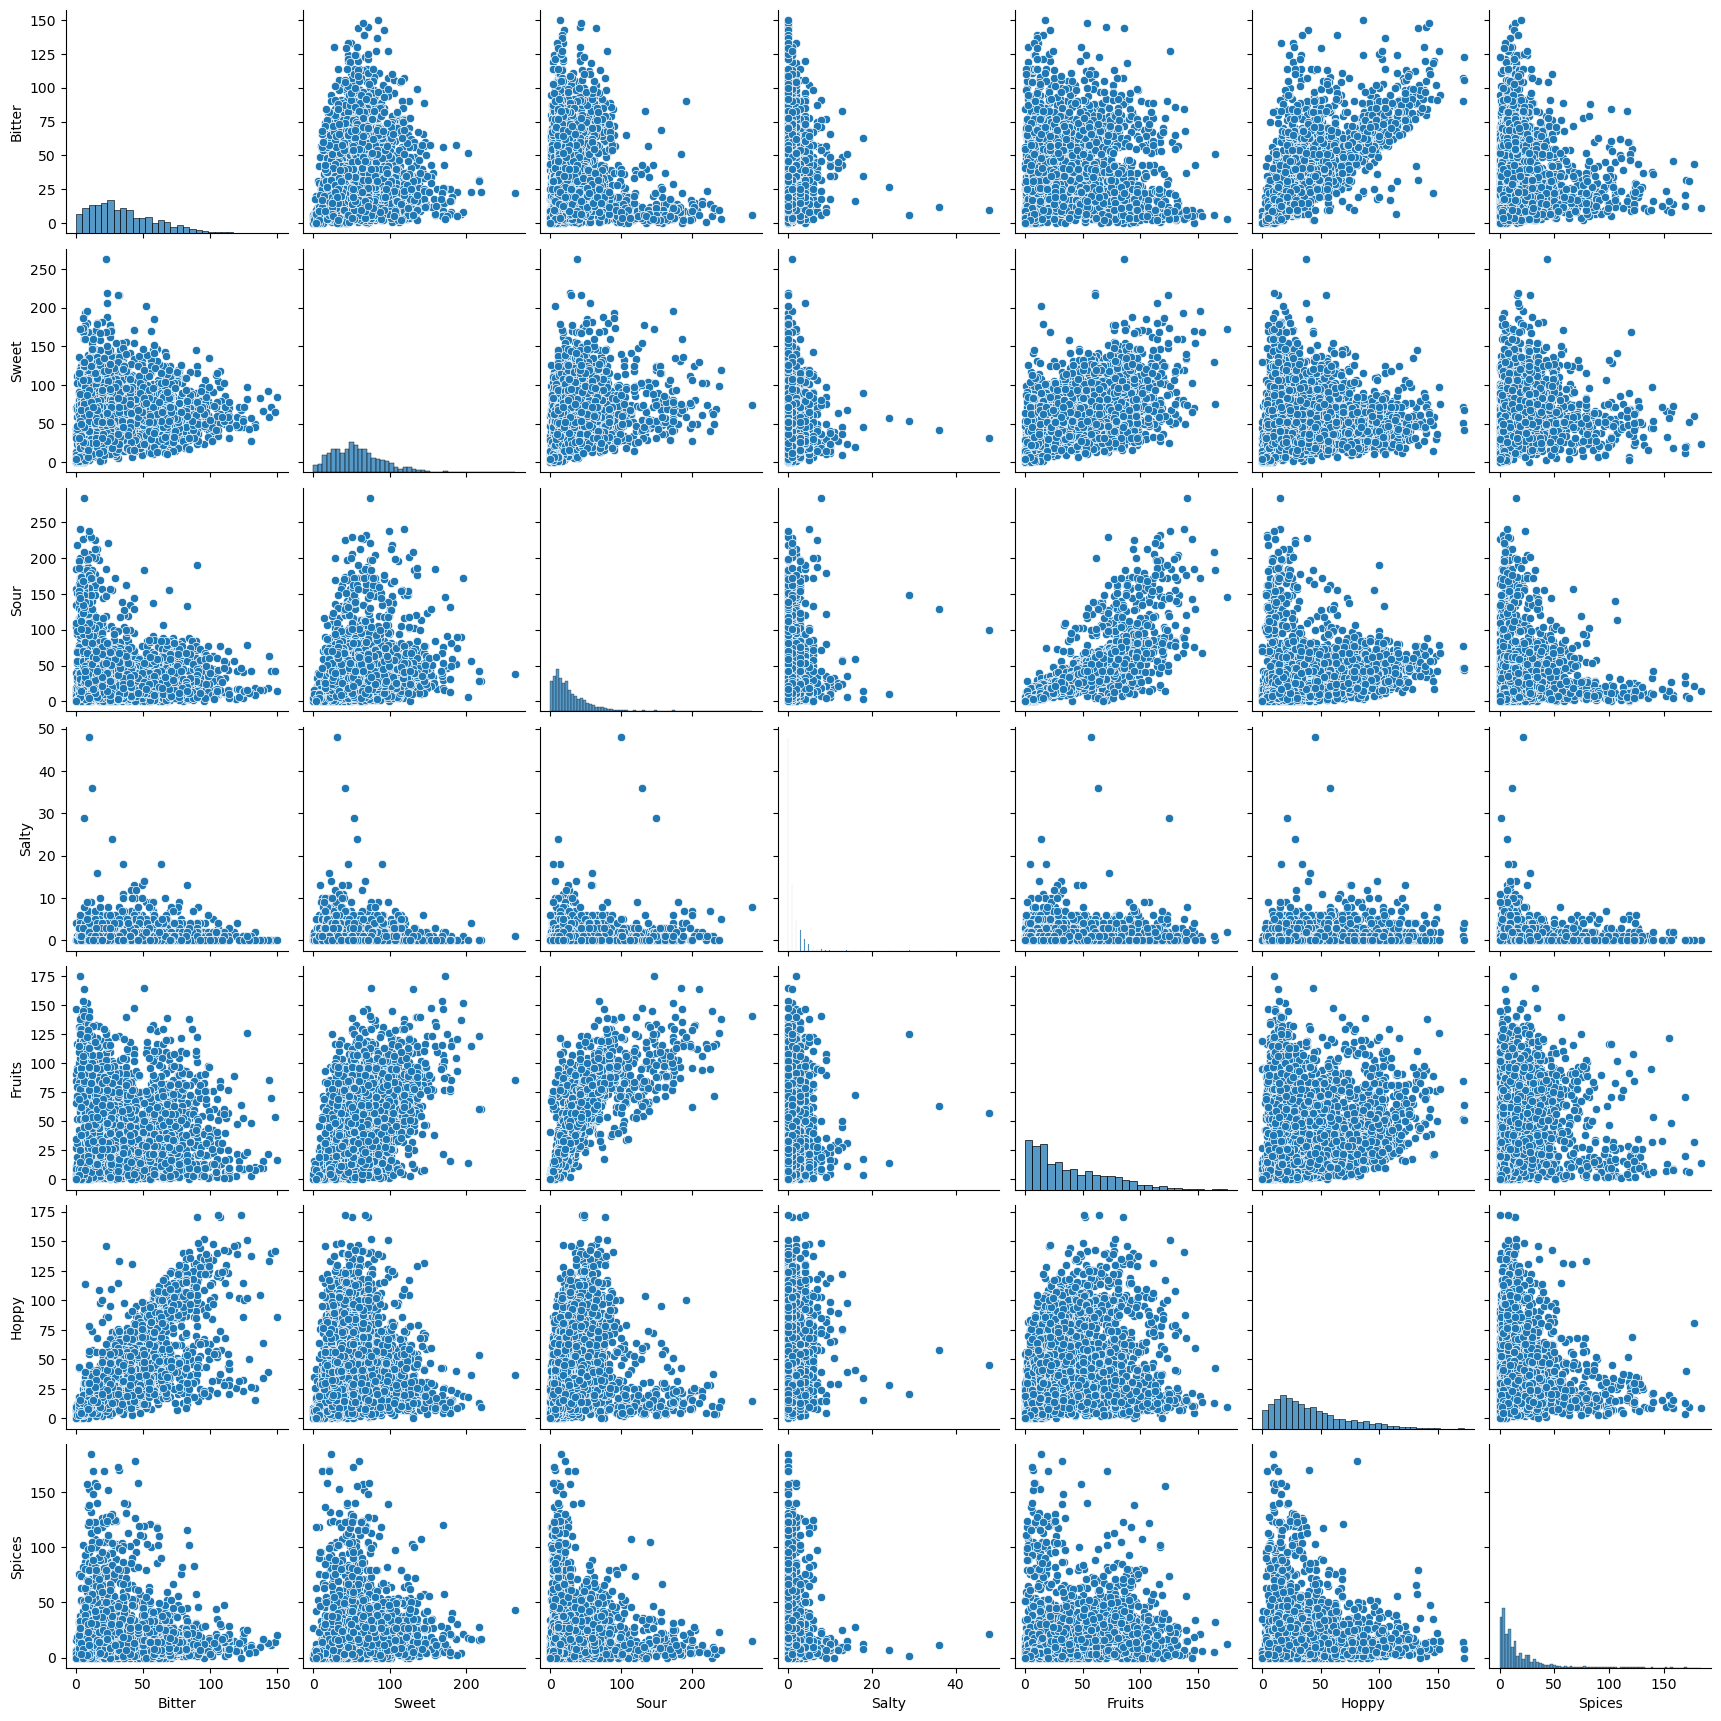

In [16]:
select_columns2 = ['Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices']
sns.pairplot(BeerQuality[select_columns2])

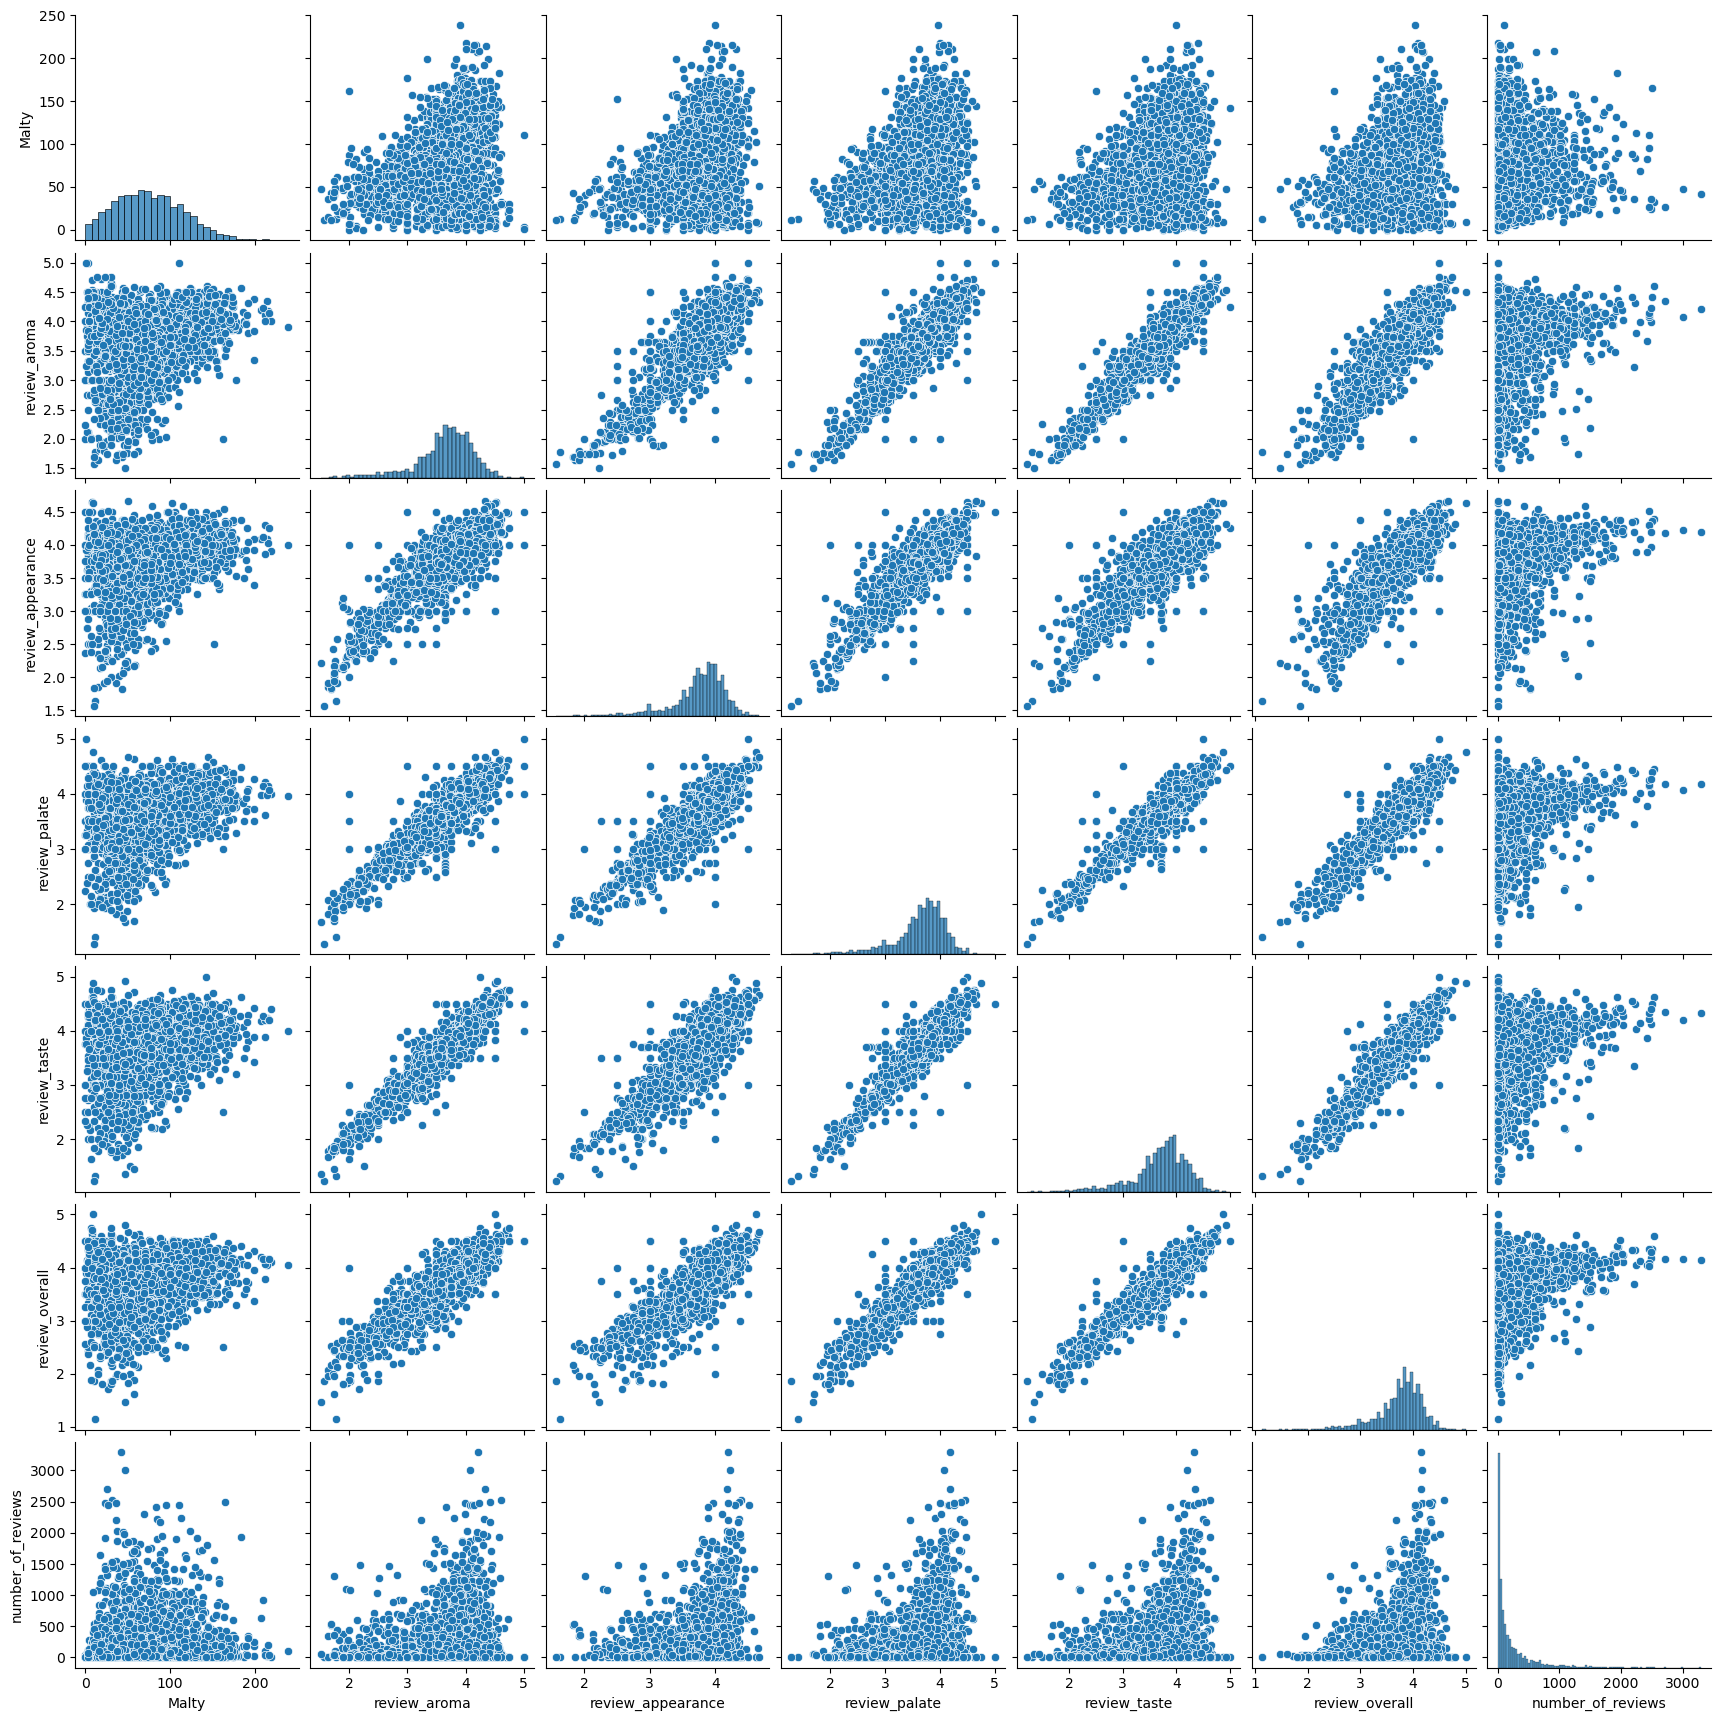

In [17]:
select_columns3 = ['Malty', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall', 'number_of_reviews']
sns.pairplot(BeerQuality[select_columns3])

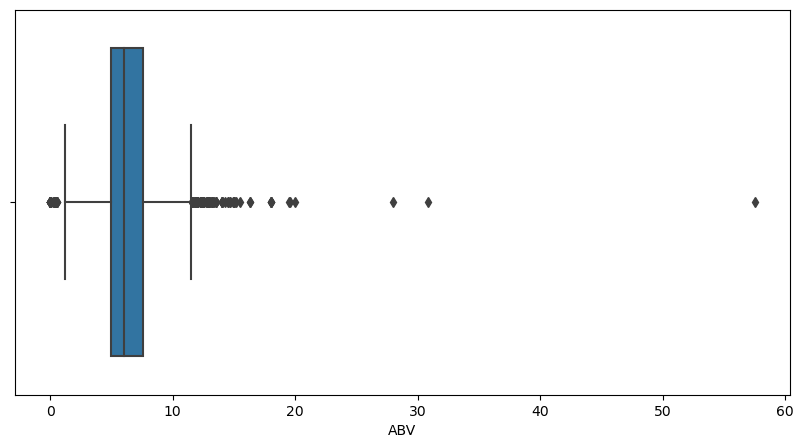

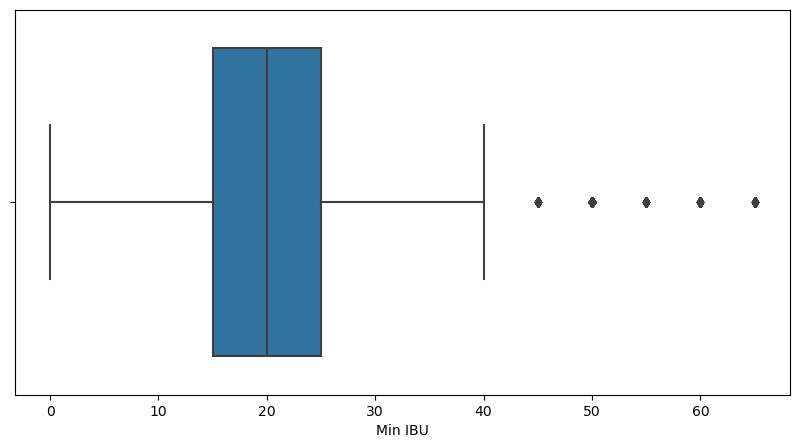

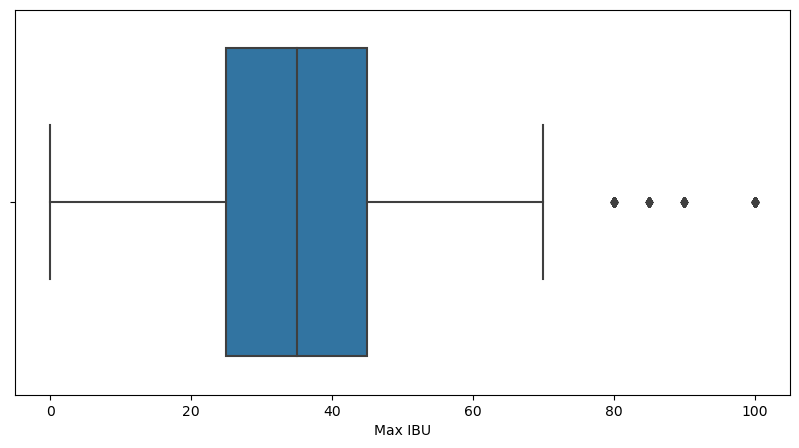

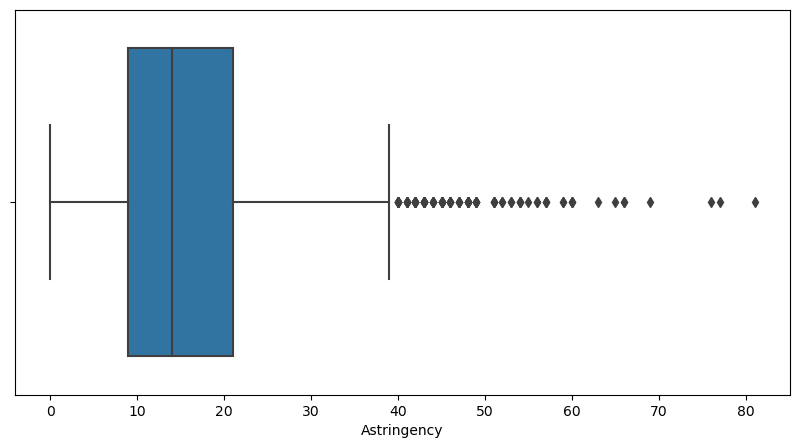

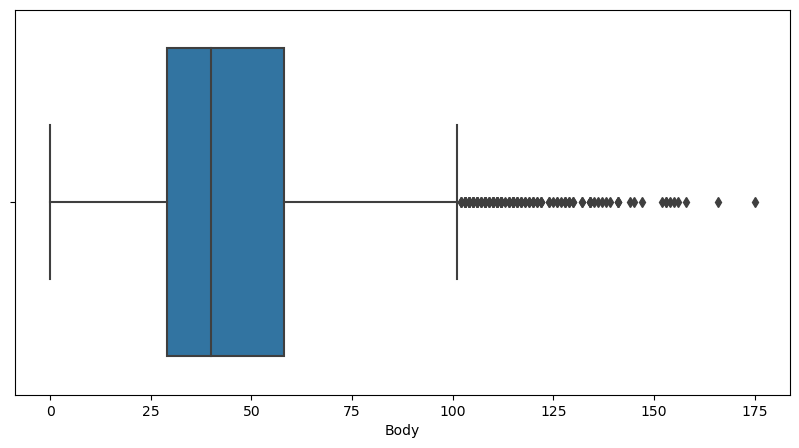

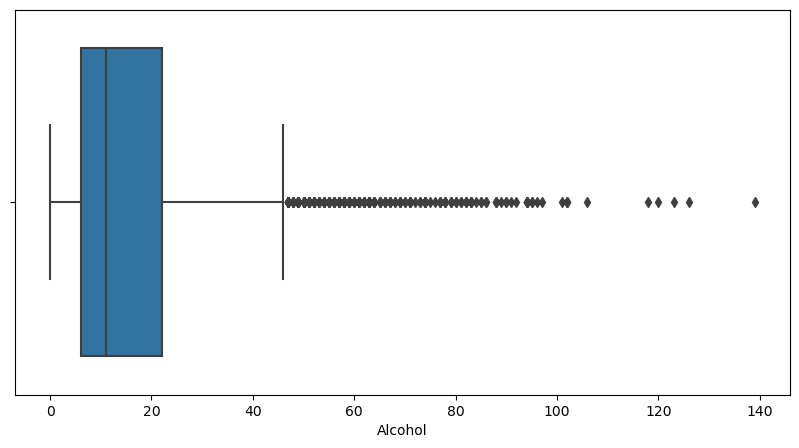

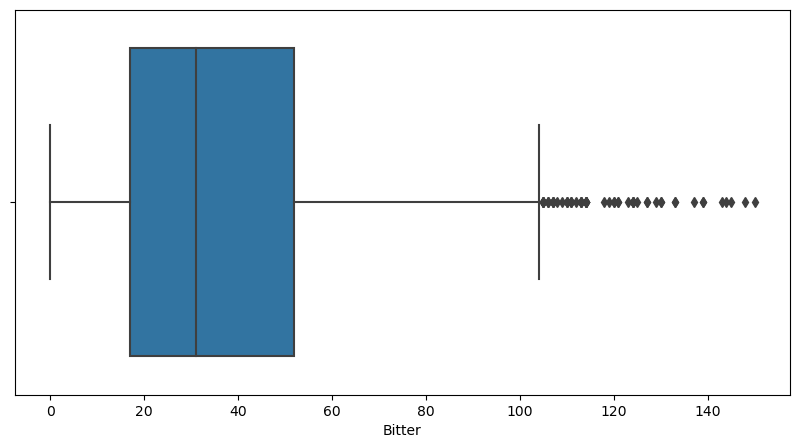

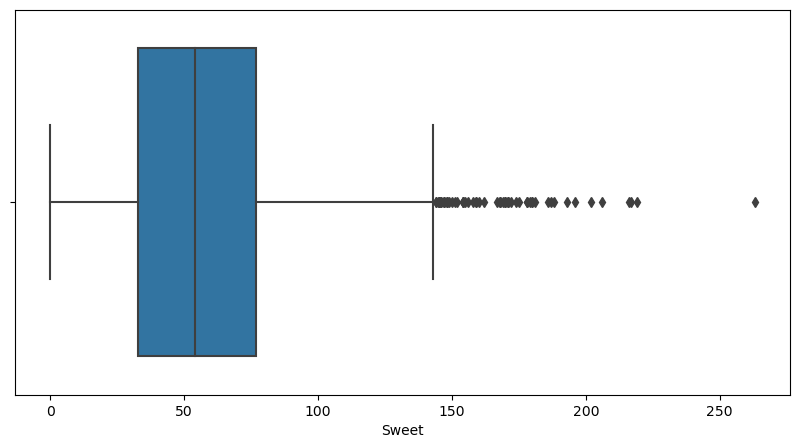

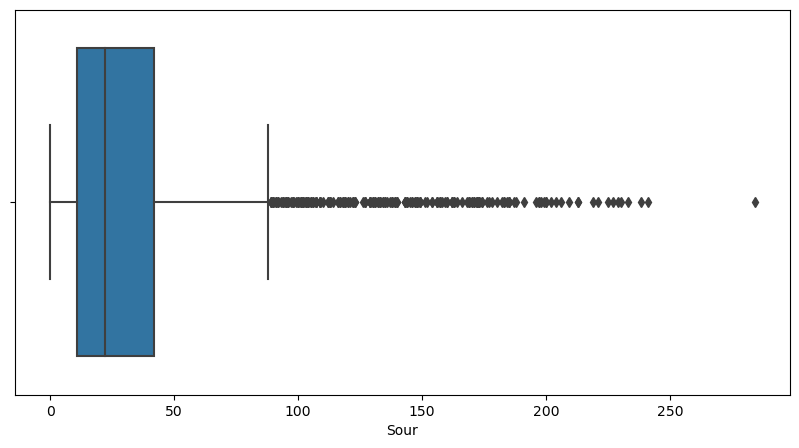

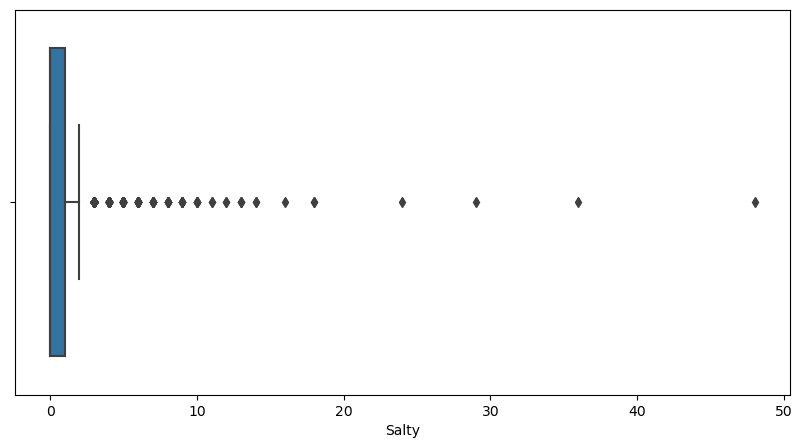

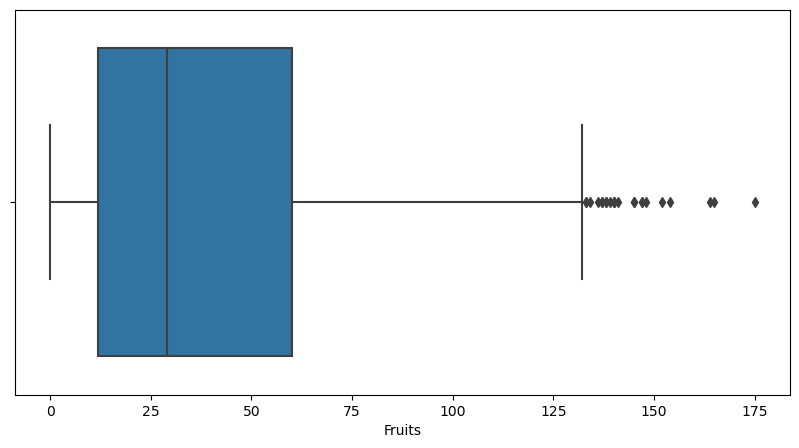

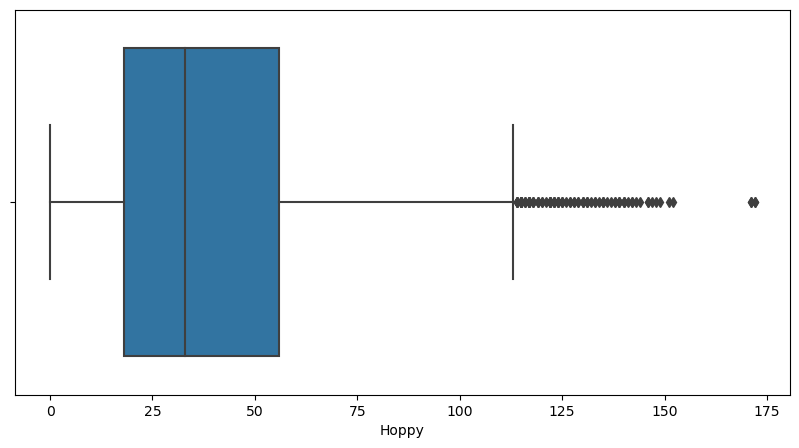

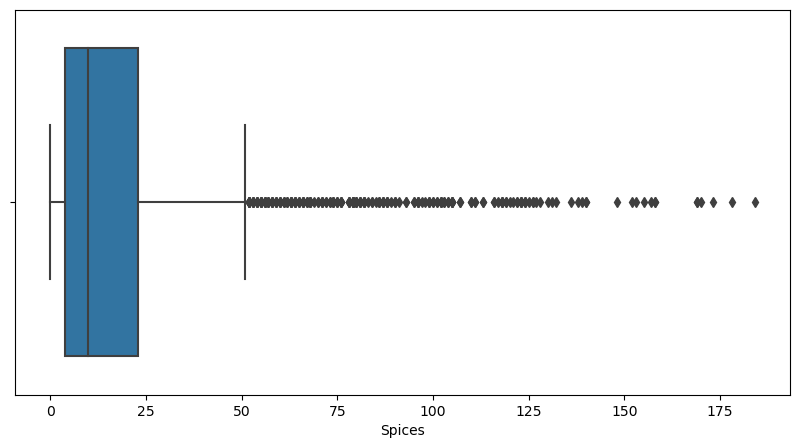

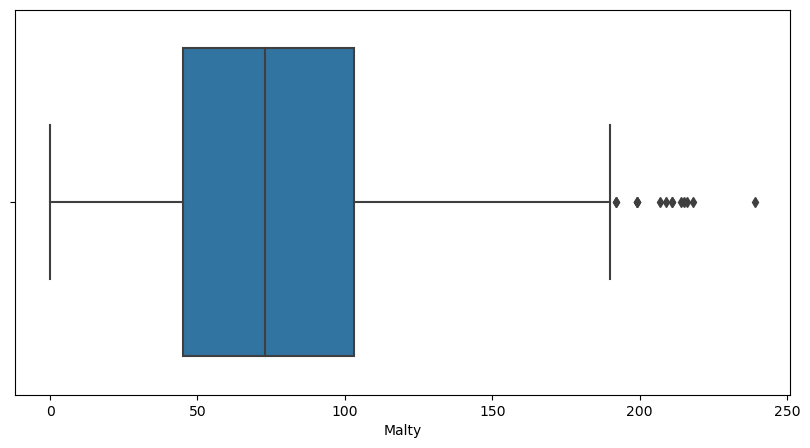

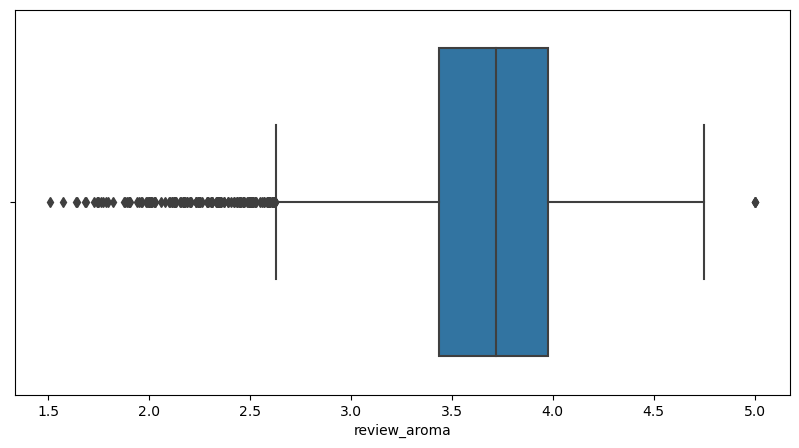

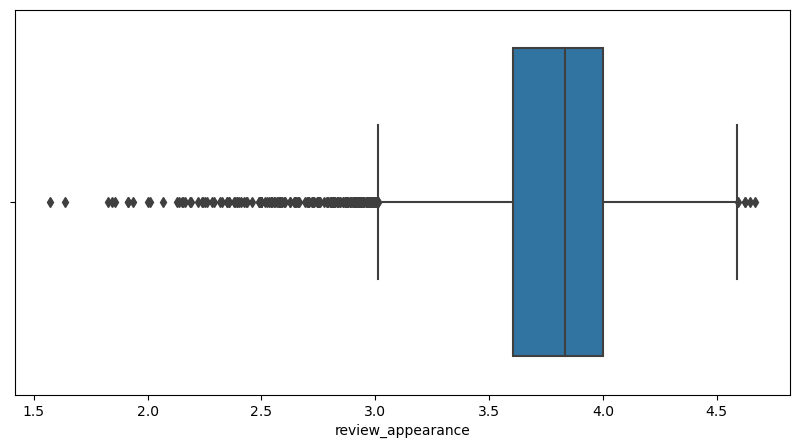

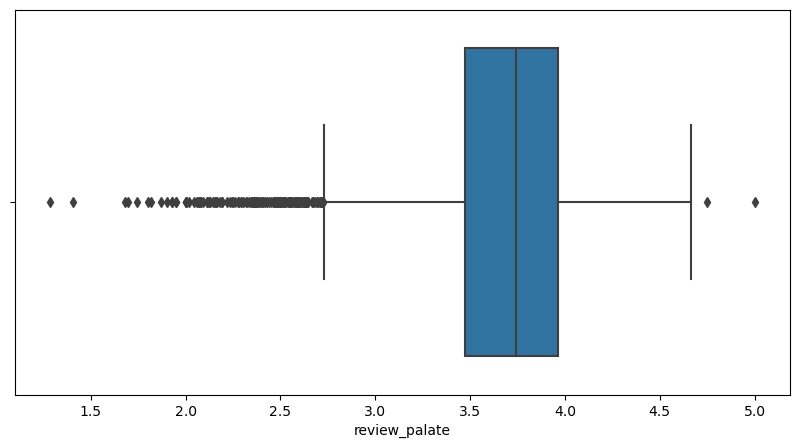

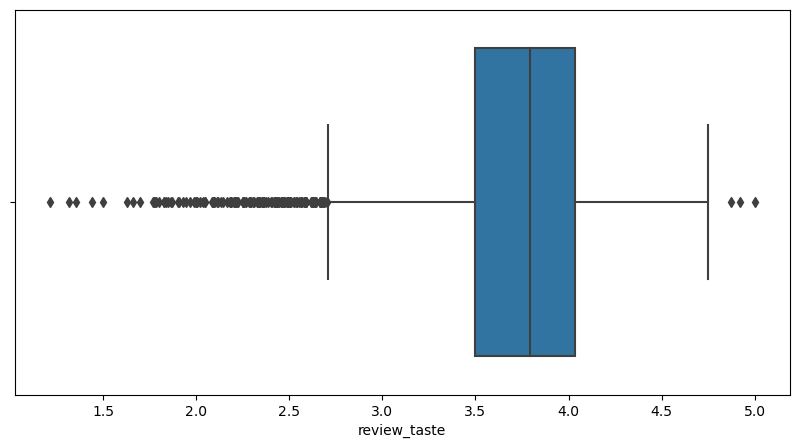

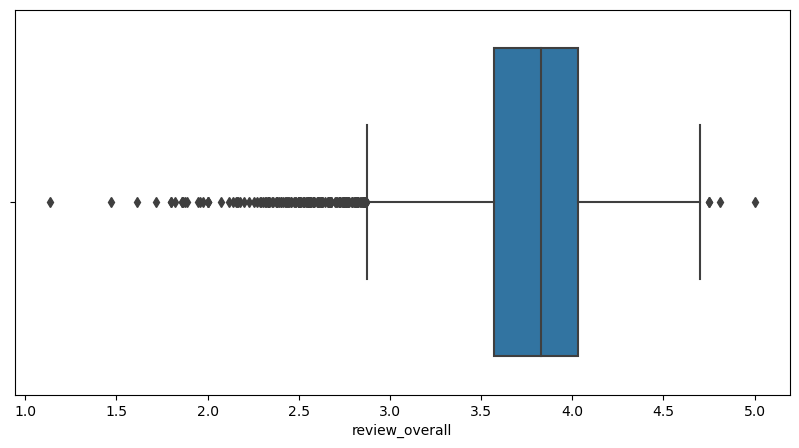

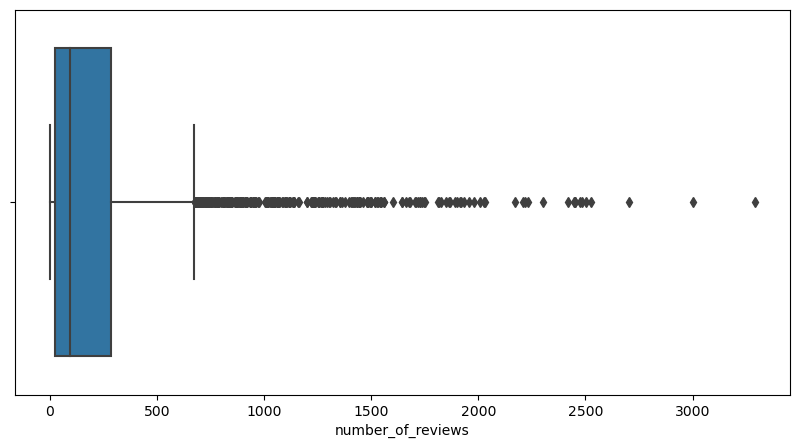

In [18]:
BeerQualityNum =BeerQuality.iloc[:, 3:]
for column in BeerQualityNum.columns:
    plt.figure(figsize = (10,5))
    sns.boxplot(x=BeerQualityNum[column])
    plt.show()

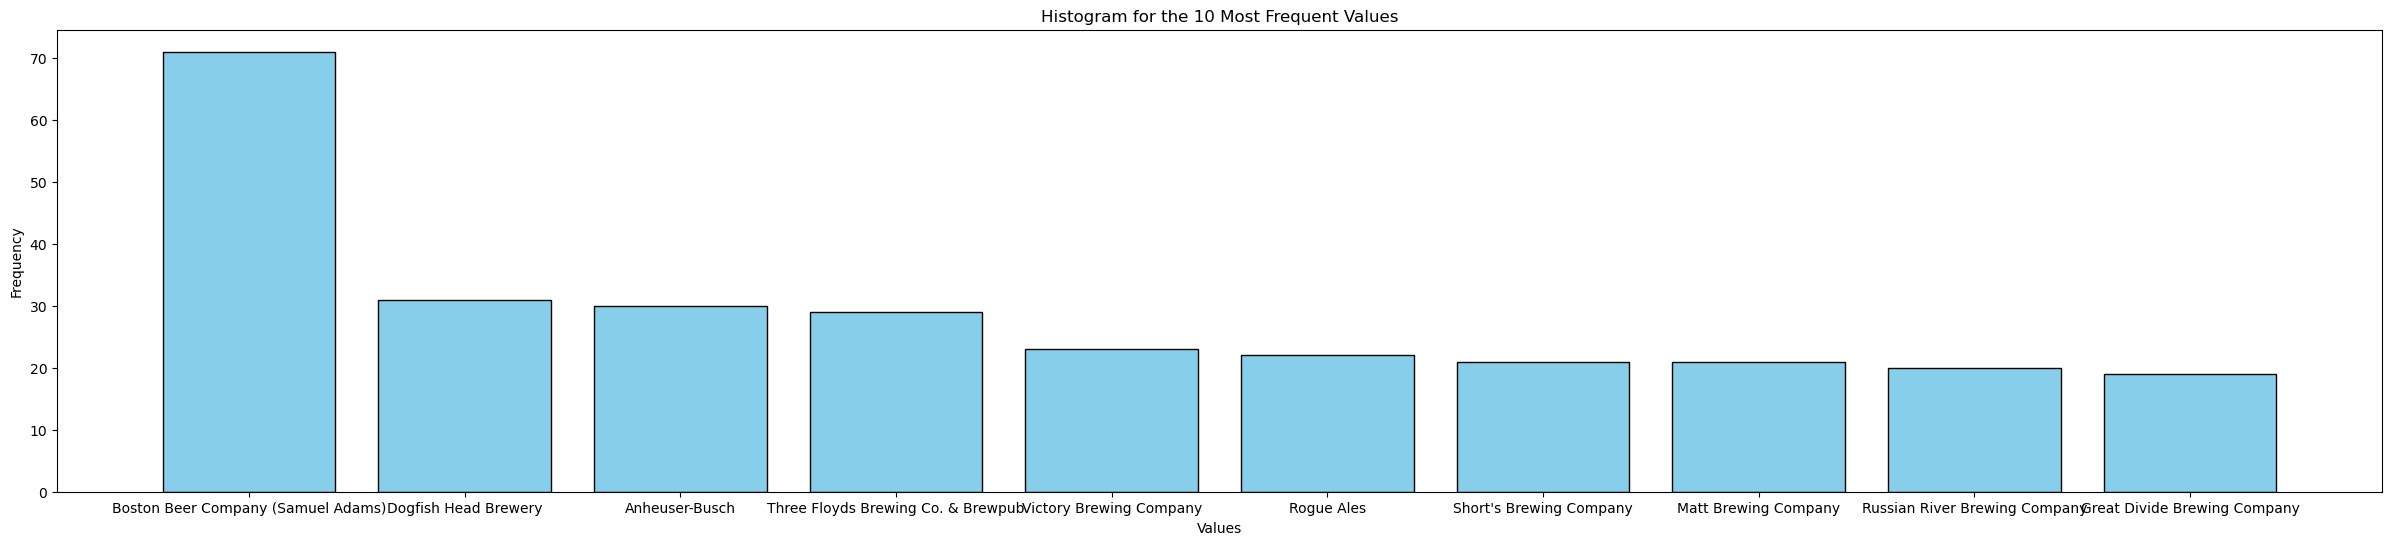

In [19]:
top_values = BeerQuality['Brewery'].value_counts().head(10)
plt.figure(figsize=(30, 6))
# Plotting the histogram for the top values
plt.bar(top_values.index, top_values, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram for the 10 Most Frequent Values')

# Show the plot
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7724\3160384017.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = BeerQuality.corr()


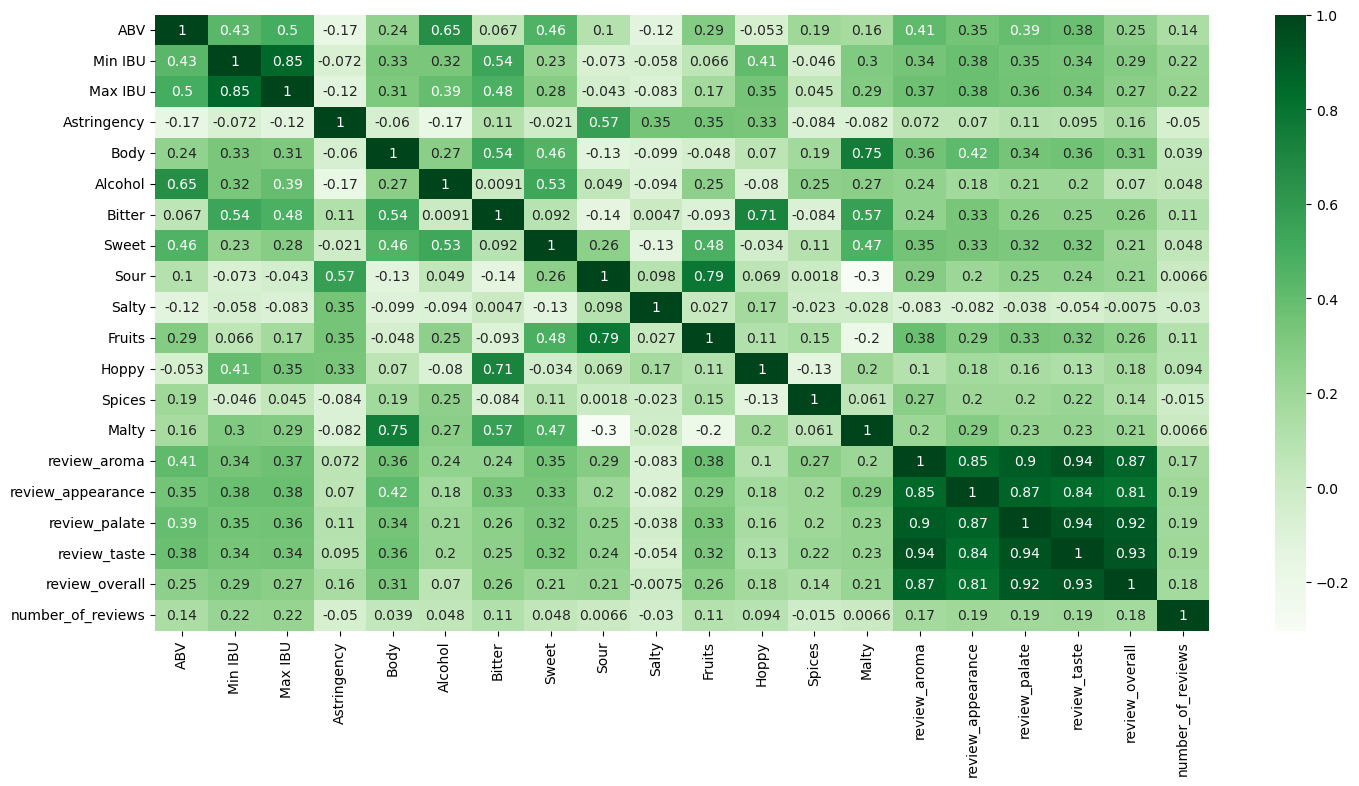

In [20]:
correlation_matrix = BeerQuality.corr()
plt.figure(figsize = (17, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'Greens', fmt = '.2g')
plt.show()

In [21]:
sc = StandardScaler()
BeerQuality_sc = sc.fit_transform(BeerQualityNum)
BeerQuality_sc

array([[-0.48169645,  0.28847954,  0.51579093, ..., -0.12193562,
         0.22408705,  0.72898746],
       [ 0.26439678,  0.28847954,  0.51579093, ...,  0.62915452,
         0.64565257,  0.68475866],
       [-0.59950064,  0.28847954,  0.51579093, ..., -0.14669636,
         0.18616187,  0.39727148],
       ...,
       [ 0.10732452,  1.04375682,  0.51579093, ..., -0.06435701,
        -0.08111573, -0.57299777],
       [ 0.38220097,  1.04375682,  0.51579093, ...,  0.38742248,
         0.29665445, -0.40437548],
       [ 0.81414968,  1.04375682,  0.51579093, ..., -0.29598214,
        -0.4948859 , -0.59511217]])

In [22]:
pca = PCA(n_components = 2)
BeerQuality_pca = pca.fit_transform(BeerQuality_sc)

BeerQuality_pc = pd.DataFrame(data = BeerQuality_pca, columns = ['COLUMN1', 'COLUMN2'])
BeerQuality_pc

COLUMN1   COLUMN2
0    -0.037984 -0.835535
1    -1.055507 -0.582507
2     0.668835 -0.864009
3    -2.633470 -0.520313
4    -0.598271 -0.884075
...        ...       ...
3192 -1.325416 -0.331934
3193 -0.770238  0.911387
3194 -0.177992 -0.604759
3195 -2.174429 -0.262857
3196 -1.046154 -0.470145

[3197 rows x 2 columns]

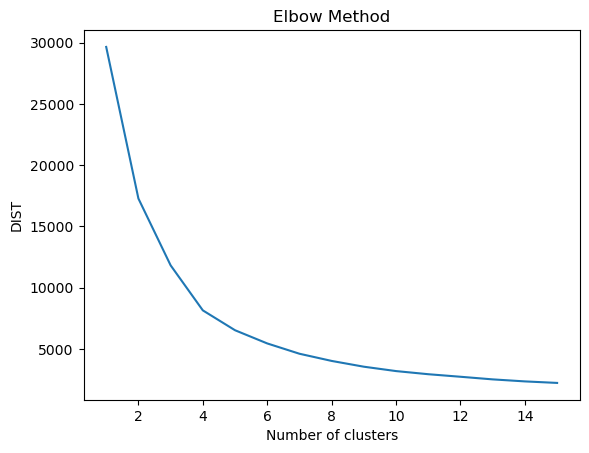

In [23]:
Dist = [] 
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(BeerQuality_pc)
    Dist.append(kmeans.inertia_)
plt.plot(range(1, 16), Dist)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('DIST')
plt.show()

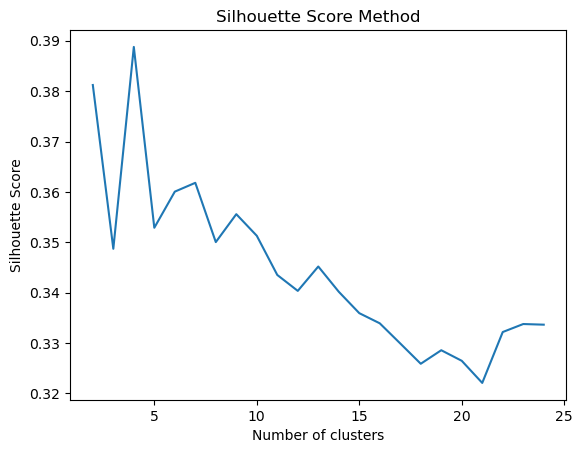

In [24]:
silhouette_scores = []

for n_clusters in range(2, 25):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(BeerQuality_pc)
    silhouette_avg = silhouette_score(BeerQuality_pc, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Score graph
plt.plot(range(2, 25), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',n_init = 'auto', random_state= 42)
kmeans.fit(BeerQuality_pc)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [26]:
BeerQuality['KmeansCluster'] = kmeans.labels_

In [27]:
grouped_data_kmeans = BeerQuality.groupby('KmeansCluster')
cluster_kmeans_means = grouped_data_kmeans.mean()
print(cluster_kmeans_means)

                    ABV    Min IBU    Max IBU  Astringency       Body  \
KmeansCluster                                                           
0              8.409053  33.595212  59.007617    13.392818  69.478781   
1              5.743242  18.631201  34.286125    16.200575  41.444285   
2              4.780696  11.201856  22.542923    12.846868  22.496520   
3              6.773180  13.368421  28.519737    27.239035  35.701754   

                 Alcohol     Bitter      Sweet       Sour     Salty  \
KmeansCluster                                                         
0              28.812840  56.911861  79.750816  27.387378  0.559304   
1              11.710280  34.157441  50.563623  23.588785  1.106398   
2              10.693735  17.412993  28.918794  13.800464  1.095128   
3              15.682018  19.598684  66.234649  92.186404  1.594298   

                  Fruits      Hoppy     Spices       Malty  review_aroma  \
KmeansCluster                                             

C:\Users\USER\AppData\Local\Temp\ipykernel_7724\453975076.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_kmeans_means = grouped_data_kmeans.mean()


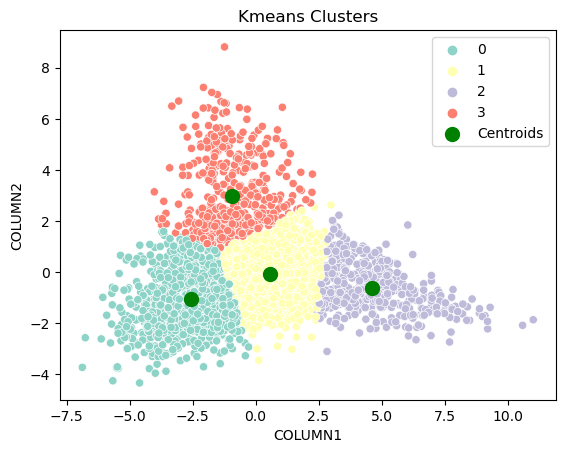

In [28]:
centroids = kmeans.cluster_centers_
sns.scatterplot(x = 'COLUMN1', y = 'COLUMN2', hue = kmeans.labels_, data = BeerQuality_pc, palette= 'Set3')
plt.scatter(centroids[:, 0], centroids[:,1], c = 'green', marker = 'o', s = 100, label = 'Centroids')
plt.title('Kmeans Clusters')
plt.xlabel('COLUMN1')
plt.ylabel('COLUMN2')
plt.legend()
plt.show()

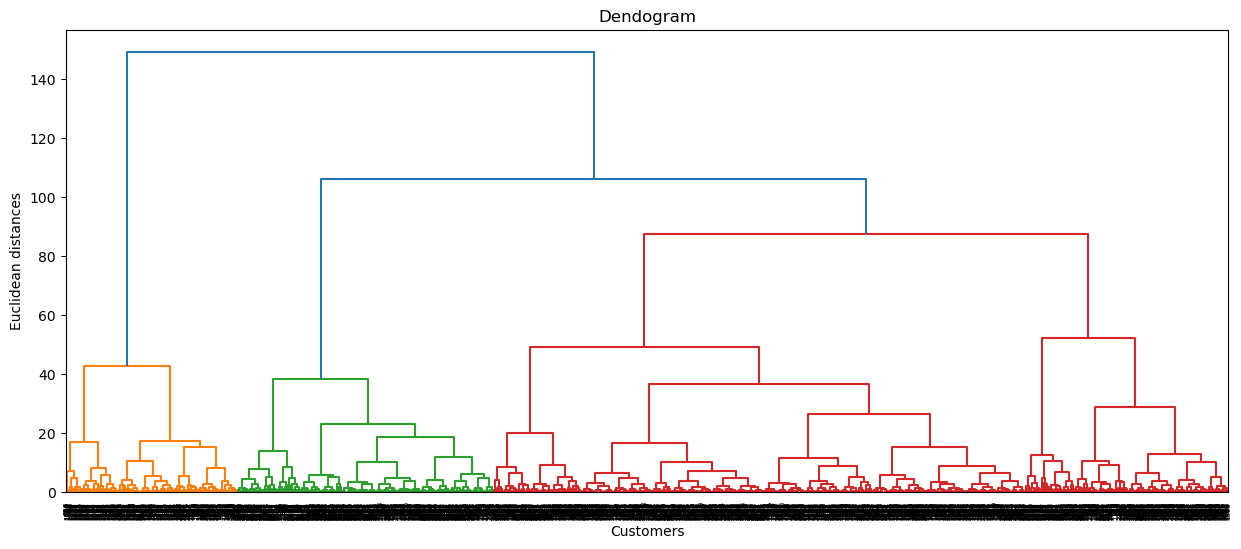

In [29]:
plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(BeerQuality_pc, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [30]:
hc = AgglomerativeClustering(n_clusters = 3 , metric= 'euclidean', linkage= 'ward')
y_hc = hc.fit_predict(BeerQuality_pc)
y_hc

array([0, 0, 0, ..., 0, 2, 0], dtype=int64)

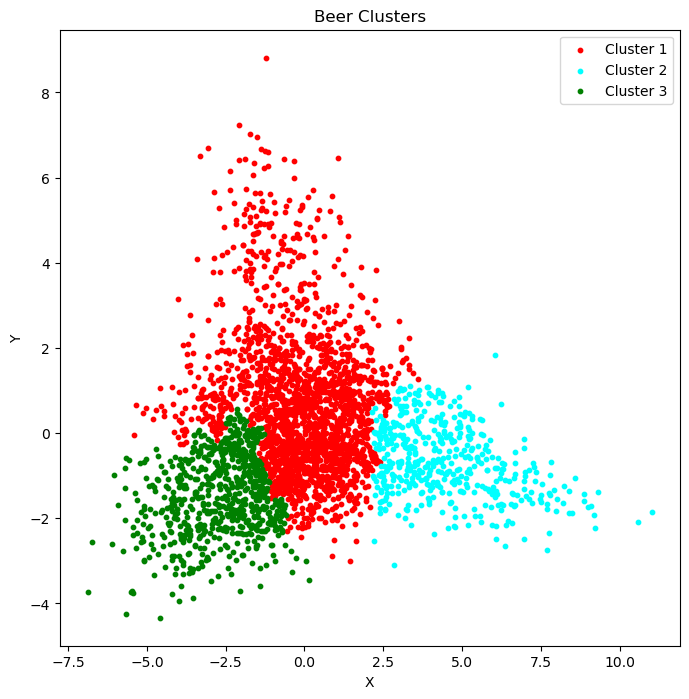

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(BeerQuality_pc.loc[y_hc == 0,'COLUMN1'], BeerQuality_pc.loc[y_hc == 0, 'COLUMN2'], s=10, c = 'red', label = 'Cluster 1')
plt.scatter(BeerQuality_pc.loc[y_hc == 1,'COLUMN1'], BeerQuality_pc.loc[y_hc == 1, 'COLUMN2'], s=10, c = 'cyan', label = 'Cluster 2')
plt.scatter(BeerQuality_pc.loc[y_hc == 2,'COLUMN1'], BeerQuality_pc.loc[y_hc == 2, 'COLUMN2'], s=10, c = 'green', label = 'Cluster 3')
plt.title('Beer Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [32]:
BeerQuality['AggloCluster'] = y_hc

In [33]:
BeerQuality.head()

Name    Style  \
0                         Amber  Altbier   
1                    Double Bag  Altbier   
2                Long Trail Ale  Altbier   
3                  Doppelsticke  Altbier   
4  Sleigh'r Dark Doüble Alt Ale  Altbier   

                                            Brewery  ABV  Min IBU  Max IBU  \
0                               Alaskan Brewing Co.  5.3       25       50   
1                            Long Trail Brewing Co.  7.2       25       50   
2                            Long Trail Brewing Co.  5.0       25       50   
3  Uerige Obergärige Hausbrauerei GmbH / Zum Uerige  8.5       25       50   
4                           Ninkasi Brewing Company  7.2       25       50   

   Astringency  Body  Alcohol  Bitter  ...  Spices  Malty  review_aroma  \
0           13    32        9      47  ...       8    111      3.498994   
1           12    57       18      33  ...      12     84      3.798337   
2           14    37        6      42  ...       4     62      3.409814   
3           13    55       31      47  ...      16    119      4.148098   
4           25    51       26      44  ...      20     95      3.625000   

   review_appearance  review_palate  review_taste  review_overall  \
0           3.636821       3.556338      3.643863        3.847082   
1           3.846154       3.904366      4.024948        4.034304   
2           3.667109       3.600796      3.631300        3.830239   
3           4.033967       4.150815      4.205163        4.005435   
4           3.973958       3.734375      3.765625        3.817708   

   number_of_reviews  KmeansCluster  AggloCluster  
0                497              1             0  
1                481              0             0  
2                377              1             0  
3                368              0             2  
4                 96              1             0  

[5 rows x 25 columns]

In [34]:
stat = BeerQuality.groupby('AggloCluster')
PrinStat = stat.mean()
print(PrinStat)

                   ABV    Min IBU    Max IBU  Astringency       Body  \
AggloCluster                                                           
0             6.261367  18.522041  34.835067    18.637444  41.594354   
1             4.867521  12.036017  23.692797    12.838983  23.610169   
2             8.394688  34.896601  61.084986    12.906516  74.154391   

                Alcohol     Bitter      Sweet       Sour     Salty  ...  \
AggloCluster                                                        ...   
0             14.442793  31.631996  57.864785  41.151560  1.152055  ...   
1             10.735169  18.430085  29.559322  12.519068  1.152542  ...   
2             28.754958  61.888102  78.627479  24.039660  0.541076  ...   

                  Hoppy     Spices       Malty  review_aroma  \
AggloCluster                                                   
0             40.857355  19.635958   68.800396      3.722635   
1             25.468220   7.288136   46.146186      2.782811   
2      

C:\Users\USER\AppData\Local\Temp\ipykernel_7724\2028042539.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  PrinStat = stat.mean()


In [35]:
# Silhouette Score
silhouette_kmeans = silhouette_score(BeerQuality_pc, kmeans.labels_)
silhouette_agg = silhouette_score(BeerQuality_pc, y_hc)

# Davies-Bouldin Score
db_kmeans = davies_bouldin_score(BeerQuality_pc, kmeans.labels_)
db_agg = davies_bouldin_score(BeerQuality_pc, y_hc)

print("KMeans: Silhouette Score :", silhouette_kmeans, "Davies-Bouldin Score :", db_kmeans)
print("Agglomerative: Silhouette Score :", silhouette_agg, "Davies-Bouldin Score :", db_agg)

KMeans: Silhouette Score : 0.38898976200548235 Davies-Bouldin Score : 0.8134719393667348
Agglomerative: Silhouette Score : 0.3183389714504119 Davies-Bouldin Score : 0.9141208598237367
